# Домашнее задание №3

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    np.array(data.Direct_Bilirubin).reshape(-1,1),
    np.array(data.Total_Bilirubin).reshape(-1,1),
test_size = 0.2, random_state = 3)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model.score(x_test, y_test)


0.9185229858613643

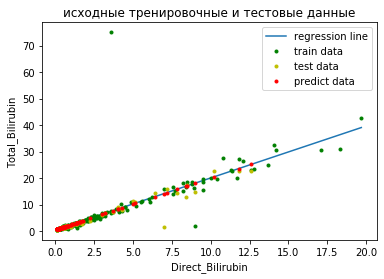

In [5]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('исходные тренировочные и тестовые данные')
x = np.linspace(data.Direct_Bilirubin.min(), data.Direct_Bilirubin.max(), 100)
y = model.coef_ * x + model.intercept_
y = np.transpose(y)
plt.plot(x,y, label = 'regression line')
plt.plot(x_train, y_train, 'g.', label = 'train data')
plt.plot(x_test, y_test, 'y.', label = 'test data')
plt.plot(x_test, y_predict, 'r.', label = 'predict data')
plt.legend()
plt.show()

Пример, как считать квантили:

In [35]:
# print("Q2 квантиль ряда : ", np.quantile(data.Age, .50)) 
# print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
# print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
# print("10 квантиль ряда : ", np.quantile(age, .1)) 

Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [11]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [10]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [13]:
for i in data: 
  if i!='Gender':
    print('\n',i)
    print("Q2 квантиль ряда : ", np.quantile(data[i], .50)) 
    print("Q1 квантиль ряда : ", np.quantile(data[i], .25)) 
    print("Q3 квантиль ряда : ", np.quantile(data[i], .75)) 
    print("10 квантиль ряда : ", np.quantile(data[i], .1)) 


 Age
Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0

 Total_Bilirubin
Q2 квантиль ряда :  1.0
Q1 квантиль ряда :  0.8
Q3 квантиль ряда :  2.6
10 квантиль ряда :  0.7

 Direct_Bilirubin
Q2 квантиль ряда :  0.3
Q1 квантиль ряда :  0.2
Q3 квантиль ряда :  1.3
10 квантиль ряда :  0.1

 Alkaline_Phosphotase
Q2 квантиль ряда :  208.0
Q1 квантиль ряда :  175.5
Q3 квантиль ряда :  298.0
10 квантиль ряда :  150.0

 Alamine_Aminotransferase
Q2 квантиль ряда :  35.0
Q1 квантиль ряда :  23.0
Q3 квантиль ряда :  60.5
10 квантиль ряда :  18.0

 Aspartate_Aminotransferase
Q2 квантиль ряда :  42.0
Q1 квантиль ряда :  25.0
Q3 квантиль ряда :  87.0
10 квантиль ряда :  19.0

 Total_Protiens
Q2 квантиль ряда :  6.6
Q1 квантиль ряда :  5.8
Q3 квантиль ряда :  7.2
10 квантиль ряда :  5.1

 Albumin
Q2 квантиль ряда :  3.1
Q1 квантиль ряда :  2.6
Q3 квантиль ряда :  3.8
10 квантиль ряда :  2.0

 Albumin_and_Globulin_Ratio
Q2 квантиль ряда :  nan
Q1 квантил

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

Больные: среднее 46.15384615384615 и квартиль 0.5 - 46.0
Здоровые: среднее 41.23952095808383 и квартиль 0.5 - 40.0


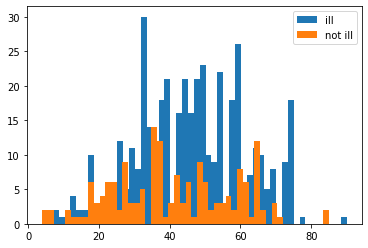

In [68]:
bins=50
ill = data[data.Dataset==1].Age#[data.Age>50]
not_ill = data[data.Dataset==2].Age#[data.Age<=50]
plt.hist(ill ,label='ill', bins=z)
plt.hist(not_ill,label='not ill', bins=bins)
plt.legend()
print(f'Больные: среднее {ill.mean()} и квартиль 0.5 - {np.quantile(ill, .50)}')
print(f'Здоровые: среднее {not_ill.mean()} и квартиль 0.5 - {np.quantile(not_ill, .50)}')

После 50: среднее 1.2367149758454106 и квартиль 0.5 - 1.0
До 50: среднее 1.3138297872340425 и квартиль 0.5 - 1.0


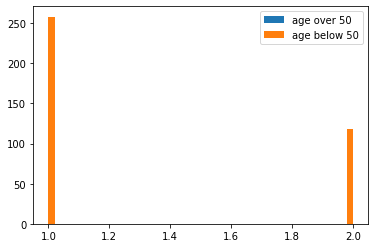

In [40]:
bins=50
over_50 = data.Dataset[data.Age>50]
below_50 = data.Dataset[data.Age<=50]
plt.hist(over_50, label='age over 50', bins=bins)
plt.hist(below_50, label='age below 50', bins=bins)
plt.legend()
print(f'После 50: среднее {over_50.mean()} и квартиль 0.5 - {np.quantile(over_50, .50)}')
print(f'До 50: среднее {below_50.mean()} и квартиль 0.5 - {np.quantile(below_50, .50)}')


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [48]:
stats.ttest_1samp(data.Total_Bilirubin[data.Dataset==1], data.Total_Bilirubin.mean())[1]

0.013871861207640042

Мы получили низкое pvalue значит мы можем опровергнуть нулевую гипотезу о том что средние значения Total_Bilirubin у больных идентичны среднем по всей выборке 

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [50]:
stats.ttest_ind(data.Total_Bilirubin[data.Dataset==1], data.Total_Bilirubin[data.Dataset==2])[1]

7.801430929364345e-08

Значение pvalue значительно ниже стандартной альфа ошибки поэтому мы отвергаем нулевую гипотезу и можем утверждать что группы не имеют схожести по этому критерию. 

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

(array([132.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  44.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

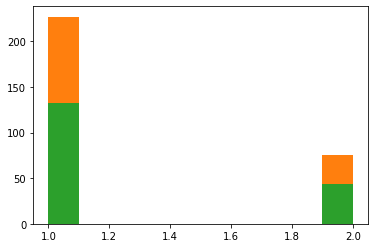

In [80]:
d1, d2, d3 = data.Dataset[data.Age<30], data.Dataset[(data.Age>=30)&(data.Age<55)], data.Dataset[(data.Age>=55)]

stats.f_oneway(d1, d2, d3)[1]

plt.hist(d1)
plt.hist(d2)
plt.hist(d3)


Статистическая значимость для трех выборок очень низка, выборки отличаются по данным критериям

Вопросы задавать на почту yustiks@gmail.com